# regenerate the data for classification purposes

some serious modification required to suit the actual data.

create a class LS  plus crystal

generic network initial easier to construct

the later adding details to further separate events can be difficult due to uncertainty nature/weirdness to data.

adding the two part noise function, (for if loop too slow, figure out a way to use numpy)

# generate better noise ... this seem to confuses with signal

# Comparison with  reconstructed parameter and raw data signal. Classification of signal and background with different input

skipping the whole process of painstaking calculate the reconstructed parameter where fine tuning are required.\

insert joke, CANDLE CANcer Distributed Learning Environment

1
5
6


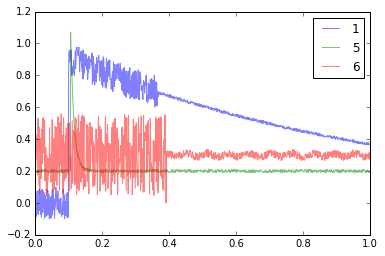

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# plt.rcParams['figure.figsize'] = (10.0, 8.0)

noise = 0.2

n = 20000
no_of_x = 1000
Rise_signal = 1

def x_generator(n):
    input_x = np.zeros((n,no_of_x))
    mid = int(n*0.5)
    for i in range(n):
        input_x[i] = np.arange(0,1,0.001)
    return input_x

x_axis = x_generator(n)

"""Noise manipulator"""

# def slowvary(no_of_x,noise):
# 	z = np.random.rand(int(no_of_x/10.+1.))*noise
# 	y = np.zeros(no_of_x)
# 	for i in range(no_of_x):
# 		y1 = int(i/10.)
# 		y2 = int(i/10.+1)
# 		f = z[y2]-z[y1]
# 		y[i] = z[y1] + f*(i%10)/10.
# 	return y

# def noisegen(x, no_of_x):
#     y = np.zeros(no_of_x)
#     y1 = no_of_x-400
#     y2 = 0.5*x
#     test = slowvary(y1,y2)
#     for i in range(no_of_x):
#         if i <400:
#             y[i] = np.random.rand(1)*x - x/2.
#         else:
#             y[i] = test[i-400]-0.1
#     return y

# def damb1(x):
#     return np.exp(-x) + (np.random.rand(1)*noise - noise/2.)

# def damb2(x):
#     return np.exp(-x) + (np.random.rand(1)*0.2 - 0.1)

# def caf(x):
#     y = np.exp(-x)
#     split = np.random.rand(1)*len(x)*0.3 + 0.2*len(x)
#     z = np.piecewise(y,[y<split,y>=split], [lambda y:damb1(y), lambda y:damb2(y)])
#     return y


""" functions """

def stand(x):
    return np.exp(-x) + np.random.rand(1)*noise + noise/2.

def stand1(x):
    return np.exp(-x) + np.random.rand(1)*noise/10. + noise/20.

# def dude(x):
#     y = np.zeros(no_of_x)
#     split = int(np.random.rand(1)*0.3*no_of_x)
#     for i in range(no_of_x):
#         if i <split:
#             y[i] = x[i] + np.random.rand(1)*0.2 -0.1
#         else:
#             y[i] = x[i] + np.random.rand(1)*noise - noise/2.
#     return y

def beta(x):
    yall = np.zeros((n,no_of_x))
    for i in range(n):
        y = x[i]
        start = 0.1 + np.random.rand(1)*0.01 -0.01/2.
        split = 0.4 + np.random.rand(1)*0.1 - 0.05
        yall[i] = np.piecewise(y, [y<start, y>=start], [lambda y:0, lambda y:np.exp(-y)])
        
        yall[i][:int(no_of_x*split)] = yall[i][:int(no_of_x*split)] + np.random.rand(int(no_of_x*split))*noise - noise/2.
        yall[i][int(no_of_x*split+1):] = yall[i][int(no_of_x*split+1):] + np.random.rand(int(no_of_x-no_of_x*split))*noise*0.1 - noise/20.
        
    return yall

def gamma(x):
    yall = np.zeros((n,no_of_x))
    for i in range(n):
        pileup = np.random.rand(1)*0.4
        y = x[i]
        start = 0.1 + np.random.rand(1)*0.01 -0.01/2
        yall[i] = np.piecewise(y, [y < start, y>=start , y >= pileup], [lambda y:0 ,lambda y:0.3*np.exp(-y), lambda y:np.exp(-y)])
        yall[i] = yall[i] + (np.random.rand(no_of_x)*noise - noise/2.)
    return yall

def alt1(x):
    yall = np.zeros((n,no_of_x))
    half = 0.5
    for i in range(n):
        y = x[i]
        start = 0.1 + np.random.rand(1)*0.01 -0.01/2
        yall[i] = np.piecewise(y, [y < start, y>=start, y >= half], [lambda y:0 ,lambda y:np.exp(-2*y), lambda y:np.exp(-(y+0.5))])
        yall[i] = yall[i] + (np.random.rand(no_of_x)*noise - noise/2.)
    return yall

def alt3(x):
    yall = np.zeros((n,no_of_x))
    for i in range(n):
        y = x[i]
        start = 0.1 + np.random.rand(1)*0.01 -0.01/2
        yall[i] = np.piecewise(y, [y<start, y>=start], [lambda y:0,lambda y:np.exp(-2*y)])
        yall[i] = yall[i] + (np.random.rand(no_of_x)*noise - noise/2.)
    return yall

def LS(x):
    yall = np.zeros((n,no_of_x))
    for i in range(n):
        y = x[i]
        start = 0.1 + np.random.rand(1)*0.01 -0.01/2
        yall[i] = np.piecewise(y, [y<start, y>=start], [lambda y:0, lambda y:np.exp(-(start+y*100-100*start))])
        yall[i] = yall[i] + (np.random.rand(no_of_x)*noise*0.1 - noise/20.) + 0.2
    return yall

def BG(x):
    yall = np.zeros((n,no_of_x))
    for i in range(n):
        y = x[i]*100 + np.random.rand(1)
        split = np.random.rand(1)*0.05 + 0.35
        yall[i][0:int(no_of_x*split)] = 0.01*np.sin(y[0:int(no_of_x*split)]) + np.random.rand(int(no_of_x*split))*0.5 -0.5/2 + 0.3
        yall[i][(1+int(no_of_x*split)):no_of_x] = 0.01*np.sin(y[(1+int(no_of_x*split)):no_of_x]) + np.random.rand(int(no_of_x-no_of_x*(split)))*0.01 -0.005 + 0.3
    return yall

def LSplusCAF(x):
    yall = np.zeros((n,no_of_x))
    for i in range(n):
        y = x[i]
        start = 0.1 + np.random.rand(1)*0.01 -0.01/2
        change = 0.5 + np.random.rand(1)*0.1 -0.05
        dec = 8
        yall[i] = np.piecewise(y, [y<start, y>=start, y>=change],[lambda y:0, lambda y:np.exp(-(start+dec*y-dec*start)), lambda y:np.exp(-(dec*change+y-dec*start-change+start))])
        yall[i] = yall[i] + np.random.rand(no_of_x)*noise - noise/2. 
    return yall

x1 = beta(x_axis)
print("1")
# x2 = gamma(x_axis)
# print("2")
# x3 = alt1(x_axis)
# print("3")
# x4 = alt3(x_axis)
# print("4")
x5 = LS(x_axis)
print("5")
x6 = BG(x_axis)
print("6")
# x7 = LSplusCAF(x_axis)
# print("7")

plt.figure()
plt.plot(x_axis[1],x1[1],label="1",alpha=0.5)
# plt.plot(x_axis[1],x2[1],label="2",alpha=0.5)
# plt.plot(x_axis[1],x3[1],label="3",alpha=0.5)
# plt.plot(x_axis[1],x4[1],label="4",alpha=0.5)
plt.plot(x_axis[1],x5[1],label="5",alpha=0.5)
plt.plot(x_axis[1],x6[1],label="6",alpha=0.5)
# plt.plot(x_axis[1],x7[1],label="7",alpha=0.5)
plt.legend()
plt.show()

# Keras

Separation
training label
test label
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 998, 8)            32        
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 996, 16)           400       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 498, 16)           0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 498, 16)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 7968)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                255008    
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)

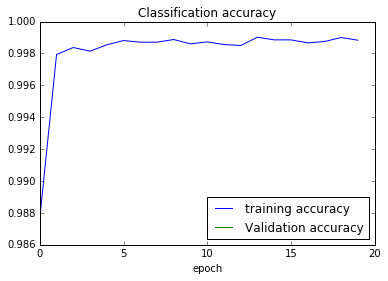

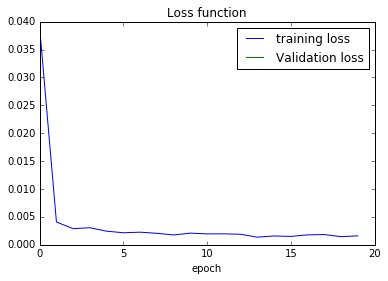

Classification accuracy = 1.0


In [17]:
def separation(x,ratio):
	train = np.zeros((int(len(x)*ratio),no_of_x))
	test = np.zeros((int(len(x)*(1.-ratio)),no_of_x))
	for i in range(n):
		if i < (n*ratio):
			train[i] = x[i]
		if i >= (n*ratio):
			k = i - int(n*ratio) - 1
			test[k] = x[i]
	return train, test

train_beta, test_beta = separation(x1,0.8)
# train_gamma, test_gamma  = separation(x2,0.8)
# train_3, test_3  = separation(x3,0.8)
# train_4, test_4  = separation(x4,0.8)
train_5, test_5  = separation(x5,0.8)
train_6, test_6  = separation(x6,0.8)
# train_7, test_7  = separation(x7,0.8)

print("Separation")

def labelling(x,num):
	label = np.zeros(len(x))
	for i in range(len(x)):
		label[i] = num
	return label

label_train_beta = labelling(train_beta,0)
# label_train_gamma = labelling(train_gamma,1)
# label_train_3 = labelling(train_3,2)
# label_train_4 = labelling(train_4,3)
label_train_5 = labelling(train_5,1)
label_train_6 = labelling(train_6,2)
# label_train_7 = labelling(train_7,3)
print("training label")

label_test_beta = labelling(test_beta,0)
# label_test_gamma = labelling(test_gamma,1)
# label_test_3 = labelling(test_3,2)
# label_test_4 = labelling(test_4,3)
label_test_5 = labelling(test_5,1)
label_test_6 = labelling(test_6,2)
# label_test_7 = labelling(test_7,3)
print("test label")

data_train = np.concatenate((train_beta,train_5,train_6), axis=0)
data_test = np.concatenate((test_beta,test_5,test_6), axis=0)
label_train = np.concatenate((label_train_beta,label_train_5,label_train_6),axis=0)
label_test = np.concatenate((label_test_beta,label_test_5,label_test_6),axis=0)

data_train = np.expand_dims(data_train,axis=2)
data_test = np.expand_dims(data_test,axis=2)

import keras

classes = 3

label_train = keras.utils.to_categorical(label_train, classes)
label_test = keras.utils.to_categorical(label_test, classes)

from keras.models import Model, Sequential, load_model
from keras.layers import Input, Dense, Activation, Conv1D, MaxPooling1D, Dropout, Flatten, BatchNormalization

from keras.regularizers import l2
from keras.optimizers import SGD

""" Convulution Neural Network """

model = Sequential()
model.add(Conv1D(8, kernel_size=3, activation="relu", input_shape=(no_of_x,1)))
model.add(Conv1D(16, 3, activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(classes,activation="softmax"))
model.summary()
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(), metrics=['accuracy'])
history = model.fit(data_train, label_train, batch_size=50, epochs=20, verbose=1, validation_data=(data_test,label_test))
score = model.evaluate(data_test, label_test, verbose=0)
model.save("for_root_implementation.h5")

print('Test loss:', score[0])
print('Test accuracy:', score[1])

print(history.history.keys())
plt.figure()
plt.title("Classification accuracy")
plt.xlabel("epoch")
plt.plot(history.history['acc'],label="training accuracy")
plt.plot(history.history['val_acc'],label="Validation accuracy")
plt.legend(loc=4)
plt.show()

plt.figure()
plt.title("Loss function")
plt.xlabel("epoch")
plt.plot(history.history['loss'],label="training loss")
plt.plot(history.history['val_loss'],label="Validation loss")
plt.legend()
plt.show()

print("Classification accuracy =",history.history['val_acc'][-1])

# testing on sample.root

working flow for the moment has worked out. from training to applying model to predict evaluation of our model.

Work still needed to be done to improve the performance of our model as it is still very crude.

#### Either completelt produce shape with the quirks with just pure functions(very difficult due to complexity in the signals itself)

#### Work out a fully workable pulse shape simulator which require some work in geant4(difficult as I do not have the expertises in this and the lack of expert to refer to)

40950/41259 [============================>.] - ETA: 0s[[  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.78642371e-37   0.00000000e+00   1.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 ..., 
 [  1.13693044e-34   0.00000000e+00   1.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]]


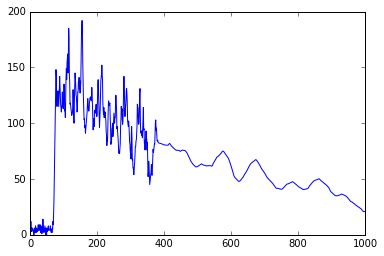

[ 1.  0.  0.  0.]


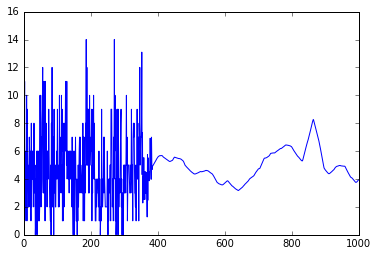

[  1.78642371e-37   0.00000000e+00   1.00000000e+00   0.00000000e+00]


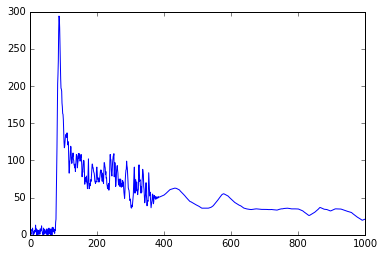

[ 1.  0.  0.  0.]


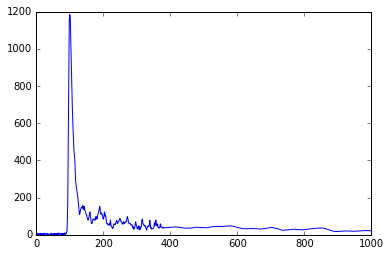

[ 1.  0.  0.  0.]


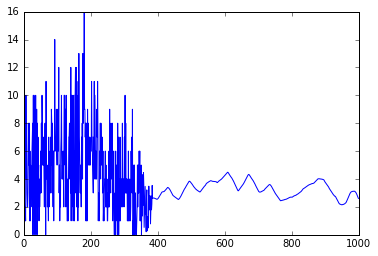

[ 0.  0.  1.  0.]


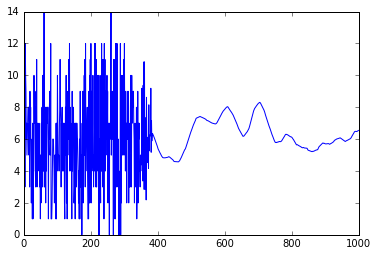

[  1.00000000e+00   0.00000000e+00   3.08274727e-13   0.00000000e+00]


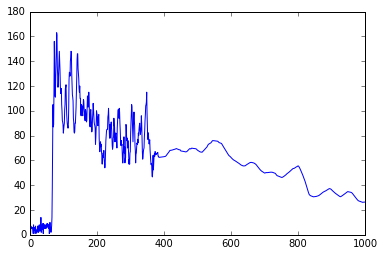

[ 1.  0.  0.  0.]


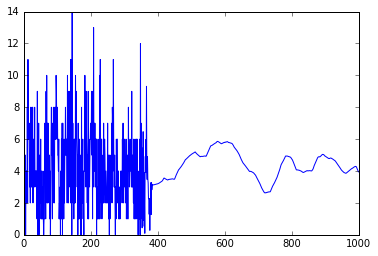

[ 0.  0.  1.  0.]


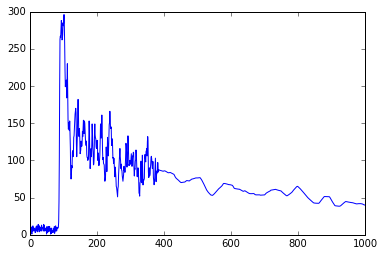

[ 1.  0.  0.  0.]


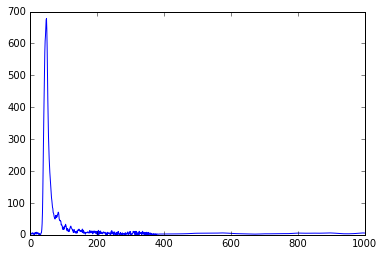

[ 0.  0.  1.  0.]


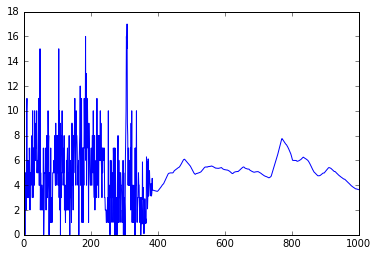

[  3.06205008e-20   0.00000000e+00   1.00000000e+00   0.00000000e+00]


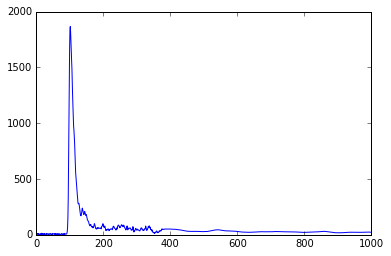

[ 1.  0.  0.  0.]


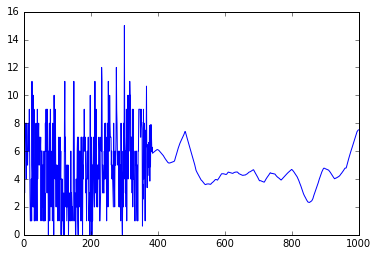

[ 0.  0.  1.  0.]


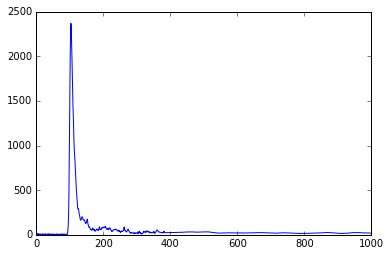

[ 1.  0.  0.  0.]


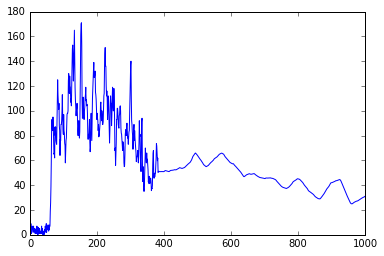

[ 1.  0.  0.  0.]


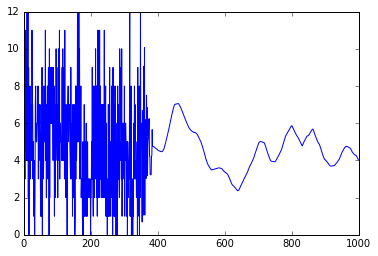

[ 0.  0.  1.  0.]


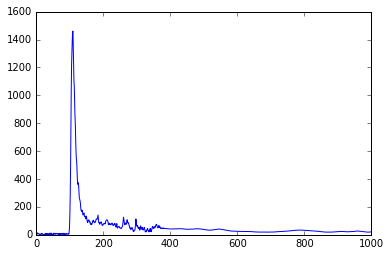

[ 1.  0.  0.  0.]


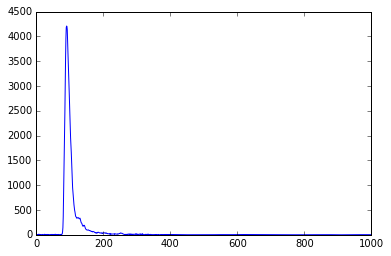

[ 0.  0.  1.  0.]


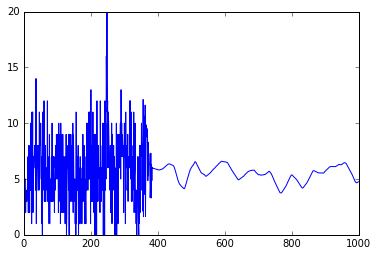

[ 0.  0.  1.  0.]


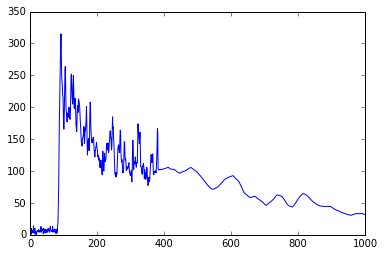

[ 1.  0.  0.  0.]


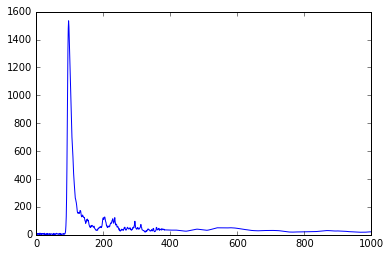

[ 1.  0.  0.  0.]


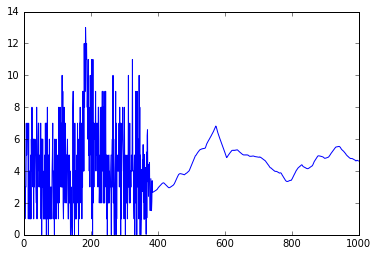

[ 0.  0.  1.  0.]


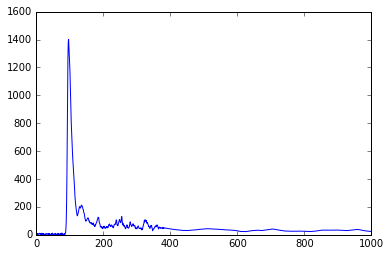

[ 1.  0.  0.  0.]


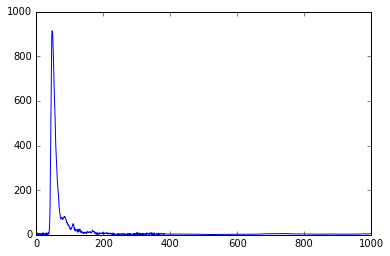

[ 0.  0.  1.  0.]


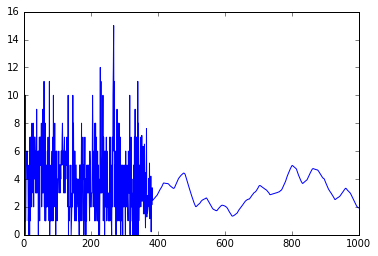

[ 0.  0.  1.  0.]


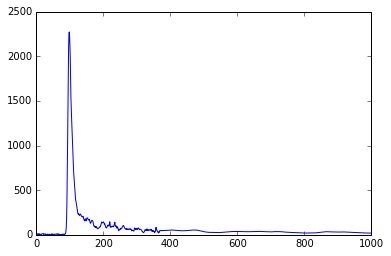

[ 1.  0.  0.  0.]


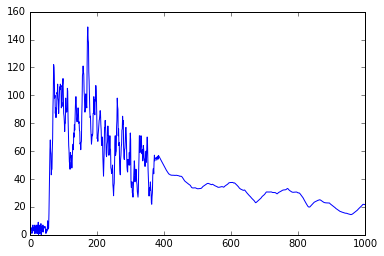

[ 1.  0.  0.  0.]


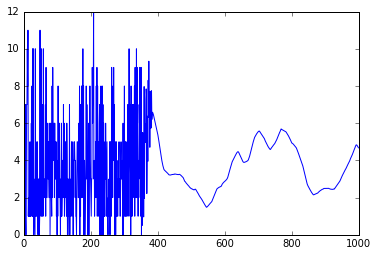

[ 0.  0.  1.  0.]


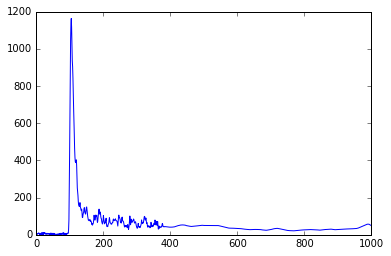

[ 1.  0.  0.  0.]


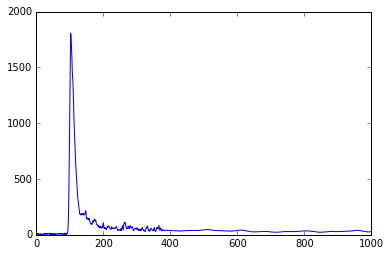

[ 1.  0.  0.  0.]


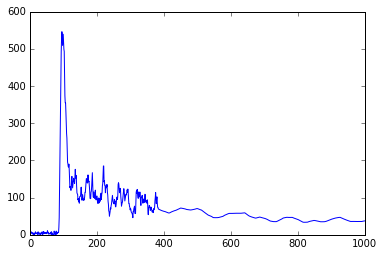

[ 1.  0.  0.  0.]


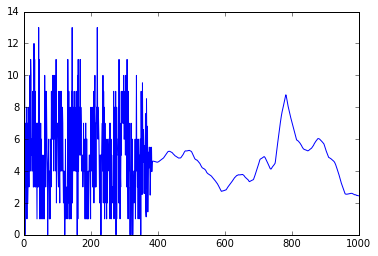

[ 0.  0.  1.  0.]


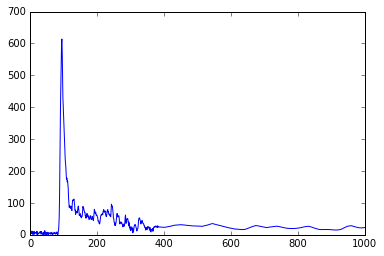

[ 1.  0.  0.  0.]


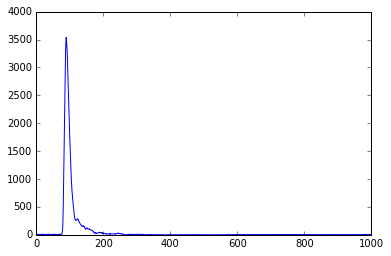

[ 0.  0.  1.  0.]


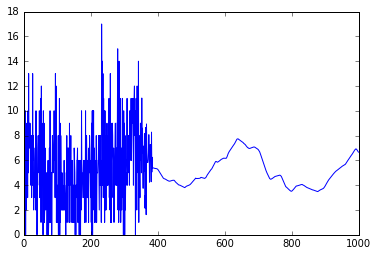

[ 0.  0.  1.  0.]


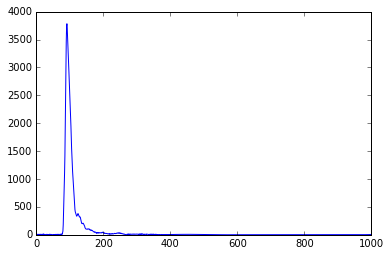

[ 0.  1.  0.  0.]


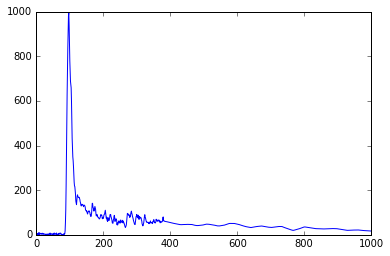

[ 1.  0.  0.  0.]


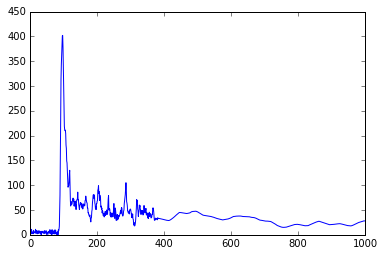

[ 1.  0.  0.  0.]


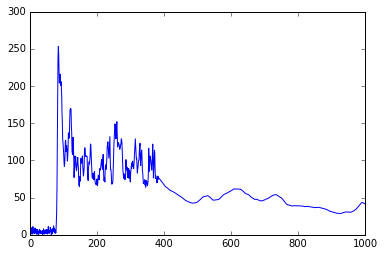

[ 1.  0.  0.  0.]


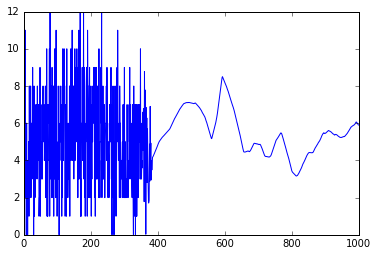

[ 0.40982223  0.          0.59017777  0.        ]


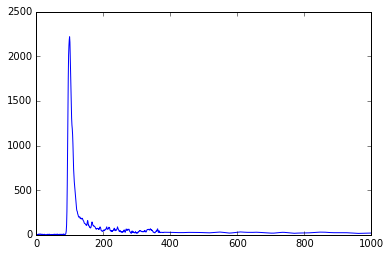

[ 1.  0.  0.  0.]


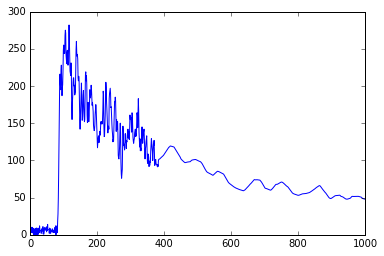

[ 1.  0.  0.  0.]


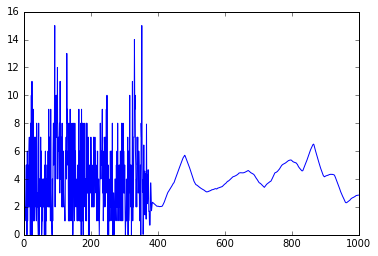

[ 0.  0.  1.  0.]


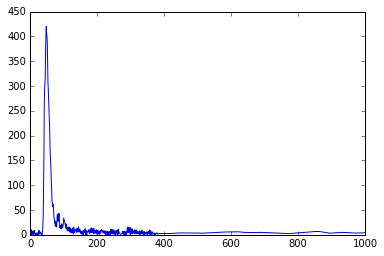

[ 0.  0.  1.  0.]


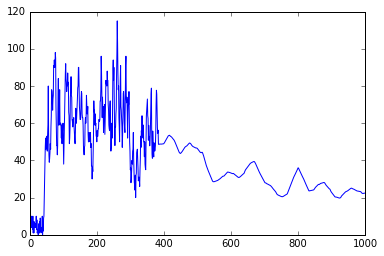

[ 1.  0.  0.  0.]


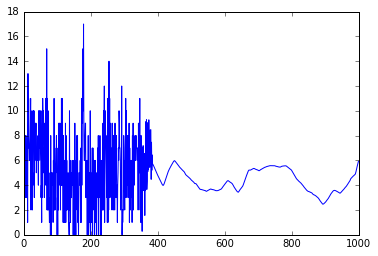

[ 0.  0.  1.  0.]


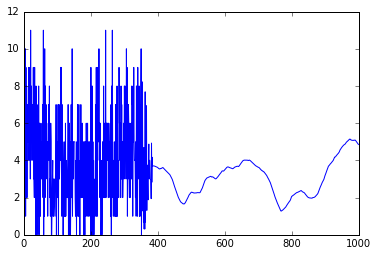

[ 0.  0.  1.  0.]


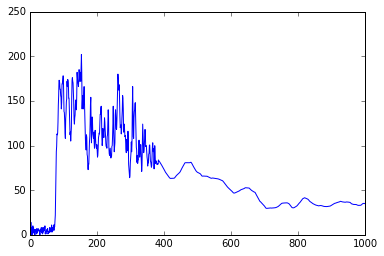

[ 1.  0.  0.  0.]


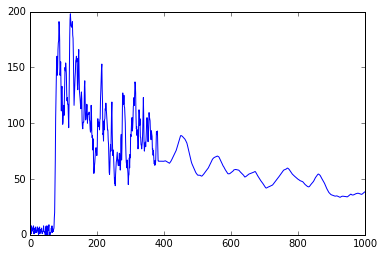

[ 1.  0.  0.  0.]


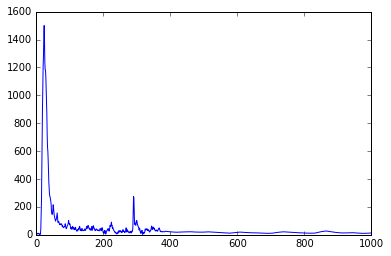

[ 0.  0.  1.  0.]


In [32]:
from root_pandas import read_root

pmtall = read_root("Run009-230-001.root","tree",columns=["PMTALL"],flatten=["PMTALL"])

def NORMPMTALL(pmtall,num_entries):
    """
    Convert read_root into numpy for speed
    invert the PMT pulse
    get rid of the last 80 bin as those bins of the pulse do not matter
    """
    x = pmtall.PMTALL.values.reshape(num_entries,4480)
    x_abs = abs(x-15190)
    extra = np.arange(1000,4480)
#     initial = np.arange(50)

    x_mod = np.delete(x_abs,extra,axis=1)
#     x_f = np.delete(x_mod,initial,axis=1)
    # x_nor = normalize(x_mod,norm="l2")
    # print(np.sum(x_nor,axis=1))
    return x_mod

l,h = pmtall.shape
l=int(l/4480)

PMTALL = NORMPMTALL(pmtall,l)
pmtall = np.expand_dims(PMTALL,axis=2)

# import keras
# from keras.models import load_model

# model = load_model('for_root_implementation.h5')
preds = model.predict(pmtall,batch_size=50,verbose=1)

print(preds)
x = np.arange(len(pmtall[1]))

for i in range(50):
    plt.figure()
    plt.plot(x,pmtall[i])
    plt.show()
    print(preds[i])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 998, 8)            32        
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 996, 16)           400       
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 498, 16)           0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 498, 16)           0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 7968)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                255008    
_________________________________________________________________
dropout_14 (Dropout)         (None, 32)                0         
__________

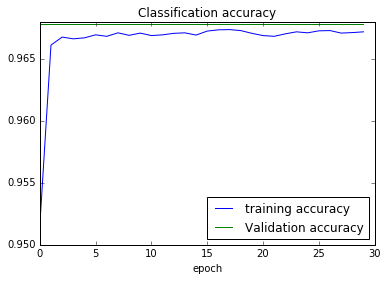

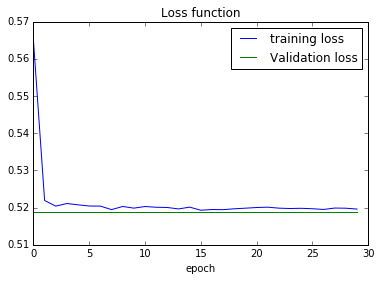

Classification accuracy = 0.967812197473


In [31]:
pmtalli = read_root("RefPulse.root","tree",columns=["PMTALL"],flatten=["PMTALL"])

li,hi = pmtalli.shape
li=int(li/4480)

PMTALLi = NORMPMTALL(pmtalli,li)

def separation(x,ratio):
    train = np.zeros((int(len(x)*ratio),len(x[0])))
    test = np.zeros((int(len(x)*(1.-ratio)),len(x[0])))
    for i in range(len(x)):
        if i < int(len(x)*ratio):
            train[i] = x[i]
        if i >= int(n*ratio):
            k = i - int(len(x)*ratio) - 1
            test[k] = x[i]
    return train, test

train_RF, test_RF = separation(PMTALLi,0.8)

label_train_RF = labelling(train_RF,3)
label_test_RF = labelling(test_RF,3)

idata_train = np.concatenate((train_beta,train_5,train_6,train_RF), axis=0)
idata_test = np.concatenate((test_beta,test_5,test_6,test_RF), axis=0)
ilabel_train = np.concatenate((label_train_beta,label_train_5,label_train_6,label_train_RF),axis=0)
ilabel_test = np.concatenate((label_test_beta,label_test_5,label_test_6,label_test_RF),axis=0)

idata_train = np.expand_dims(idata_train,axis=2)
idata_test = np.expand_dims(idata_test,axis=2)

classes = 4

ilabel_train = keras.utils.to_categorical(ilabel_train, classes)
ilabel_test = keras.utils.to_categorical(ilabel_test, classes)

from keras.models import Model, Sequential, load_model
from keras.layers import Input, Dense, Activation, Conv1D, MaxPooling1D, Dropout, Flatten, BatchNormalization

from keras.regularizers import l2
from keras.optimizers import SGD

""" Convulution Neural Network """

model = Sequential()
model.add(Conv1D(8, kernel_size=3, activation="relu", input_shape=(no_of_x,1)))
model.add(Conv1D(16, 3, activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(classes,activation="softmax"))
model.summary()
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(), metrics=['accuracy'])


history = model.fit(idata_train, ilabel_train, batch_size=50, epochs=30, verbose=1, validation_data=(idata_test,ilabel_test))
score = model.evaluate(idata_test, ilabel_test, verbose=0)
model.save("for_root_implementation.h5")

print('Test loss:', score[0])
print('Test accuracy:', score[1])

print(history.history.keys())
plt.figure()
plt.title("Classification accuracy")
plt.xlabel("epoch")
plt.plot(history.history['acc'],label="training accuracy")
plt.plot(history.history['val_acc'],label="Validation accuracy")
plt.legend(loc=4)
plt.show()

plt.figure()
plt.title("Loss function")
plt.xlabel("epoch")
plt.plot(history.history['loss'],label="training loss")
plt.plot(history.history['val_loss'],label="Validation loss")
plt.legend()
plt.show()

print("Classification accuracy =",history.history['val_acc'][-1])